In [2]:
import pandas as pd

df = pd.read_csv("data/countries.csv", sep=";")


In [3]:
# Ver las primeras filas
print(df.head())

# Información general del dataframe
print(df.info())


  alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          Euro                 NaN   AN     3041565                 ca   
1        Dirham                 NaN   AE      290557  ar-AE,fa,en,hi,ur   
2       Afghani                 NaN   AF     1149361  fa-AF,ps,uz-AF,tk   
3        Dollar                 NaN   AC     3576396              en-AG   
4        Dollar                 NaN   AV     3573511              en-AI   

                   name         neighbours  numeric   phone  population  \
0               Andorra            

In [4]:
# Filas y columnas
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")


Filas: 252, Columnas: 19


In [5]:
print(df.dtypes)


alpha_2                 object
alpha_3                 object
area                   float64
capital                 object
continent               object
currency_code           object
currency_name           object
eqivalent_fips_code     object
fips                    object
geoname_id               int64
languages               object
name                    object
neighbours              object
numeric                  int64
phone                   object
population               int64
postal_code_format      object
postal_code_regex       object
tld                     object
dtype: object


In [6]:
# Solo para columnas numéricas
print(df.describe())

# Si quieres ver también las categóricas
print(df.describe(include='object'))


               area    geoname_id     numeric    population
count  2.520000e+02  2.520000e+02  252.000000  2.520000e+02
mean   5.952879e+05  2.427870e+06  434.309524  2.727679e+07
std    1.904818e+06  1.632093e+06  254.663139  1.164127e+08
min    0.000000e+00  4.951800e+04    0.000000  0.000000e+00
25%    1.098000e+03  1.163774e+06  217.000000  1.879528e+05
50%    6.489450e+04  2.367967e+06  436.000000  4.268583e+06
75%    3.622245e+05  3.478296e+06  652.500000  1.536688e+07
max    1.710000e+07  8.505033e+06  894.000000  1.330044e+09
       alpha_2 alpha_3   capital continent currency_code currency_name  \
count      251     252       246       210           251           251   
unique     251     252       244         6           155            82   
top         AD     AND  Kingston        AF           EUR        Dollar   
freq         1       1         2        58            35            56   

       eqivalent_fips_code fips languages     name neighbours phone  \
count             

In [7]:
df['target'] = (df['population'] > 10_000_000).astype(int)


In [8]:
print(df['target'].value_counts())


target
0    169
1     83
Name: count, dtype: int64


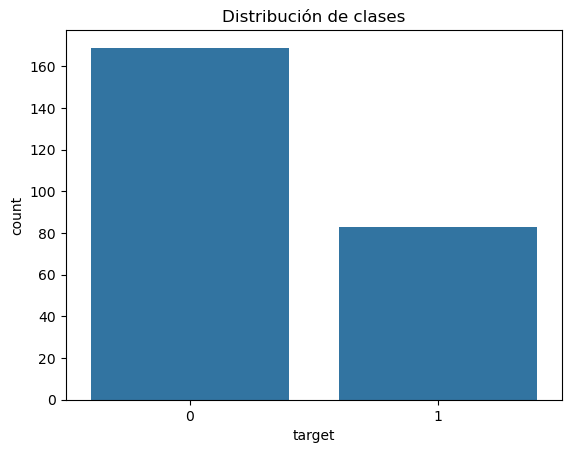

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='target')
plt.title('Distribución de clases')
plt.show()


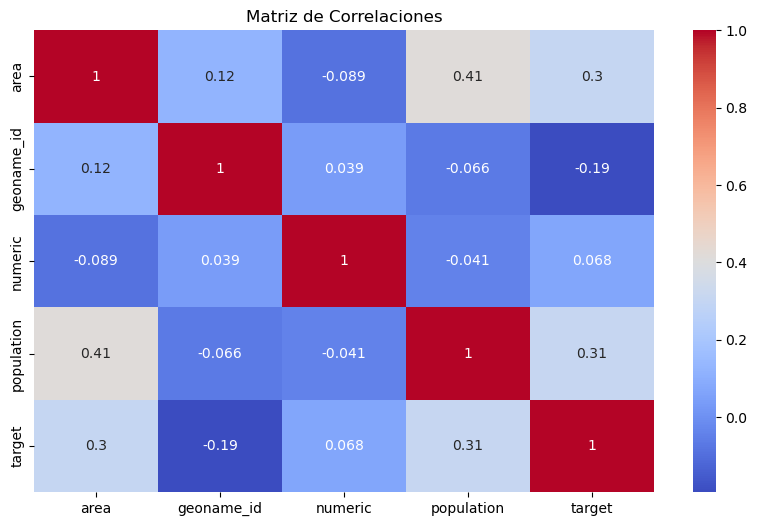

In [10]:
# Correlación entre variables numéricas
correlation_matrix = df.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()


In [11]:
# Asimetría de las columnas numéricas
print(df.select_dtypes(include='number').skew())


area          5.863768
geoname_id    0.989479
numeric       0.010574
population    9.580187
target        0.730488
dtype: float64


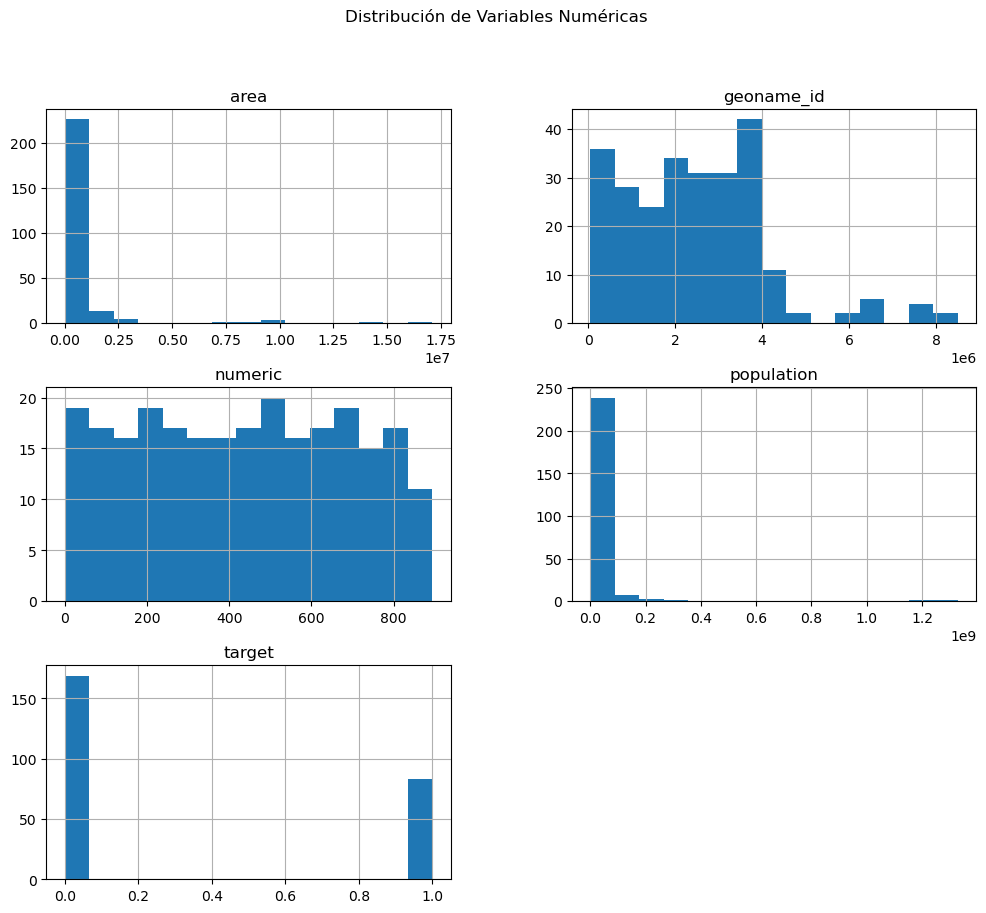

In [12]:
import matplotlib.pyplot as plt

df.select_dtypes(include='number').hist(bins=15, figsize=(12, 10))
plt.suptitle("Distribución de Variables Numéricas")
plt.show()


In [13]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y transformación
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer, PowerTransformer


In [14]:
numericas = ['area', 'population', 'numeric']
data_num = df[numericas].copy()


In [15]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data_num)

df_std = pd.DataFrame(data_std, columns=[col + "_std" for col in data_num.columns])
print(df_std.head())


   area_std  population_std  numeric_std
0 -0.312893       -0.234054    -1.630130
1 -0.269542       -0.191951     1.375882
2  0.027465        0.015876    -1.693083
3 -0.312906       -0.234031    -1.598653
4 -0.313085       -0.234663     0.887995


In [36]:
# Normalización Min-Max
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data_num)

df_norm = pd.DataFrame(data_norm, columns=[col + "_norm" for col in data_num.columns])
print(df_norm)


     area_norm  population_norm  numeric_norm
0     0.000027         0.000063      0.022371
1     0.004847         0.003741      0.876957
2     0.037865         0.021895      0.004474
3     0.000026         0.000065      0.031320
4     0.000006         0.000010      0.738255
..         ...              ...           ...
247   0.071340         0.036841      0.794183
248   0.044013         0.010120      1.000000
249   0.022841         0.009820      0.800895
250   0.005985         0.008142      0.996644
251   0.000056         0.000226      0.592841

[252 rows x 3 columns]


In [33]:
#binarización
binarizer = Binarizer(threshold=10_000_000)
pop_bin = binarizer.fit_transform(data_num[['population']])

df['population_bin'] = pop_bin
print(df[['population', 'population_bin']])


     population  population_bin
0         84000               0
1       4975593               0
2      29121286               1
3         86754               0
4         13254               0
..          ...             ...
247    49000000               1
248    13460305               1
249    13061000               1
250    10829175               1
251      300000               0

[252 rows x 2 columns]


In [ ]:
#Transforma datos sesgados a distribuciones normales (solo positivos).
from scipy.stats import boxcox

# Asegurarse de que no hay ceros o negativos
area_pos = data_num['area'][data_num['area'] > 0]

# Aplicar Box-Cox
area_boxcox, lambda_bc = boxcox(area_pos)

# Añadir al DataFrame
df['area_boxcox'] = np.nan
df.loc[area_pos.index, 'area_boxcox'] = area_boxcox

print(f"Lambda (Box-Cox): {lambda_bc}")


Lambda (Box-Cox): 0.08414158550621725


In [19]:
pt = PowerTransformer(method='yeo-johnson')
data_yeoj = pt.fit_transform(data_num)

df_yeoj = pd.DataFrame(data_yeoj, columns=[col + "_yeoj" for col in data_num.columns])
print(df_yeoj.head())


   area_yeoj  population_yeoj  numeric_yeoj
0  -1.157717        -0.975126     -1.909953
1   0.221333         0.219907      1.273150
2   0.959182         0.942731     -2.083911
3  -1.169339        -0.967743     -1.840399
4  -1.460353        -1.354448      0.881327


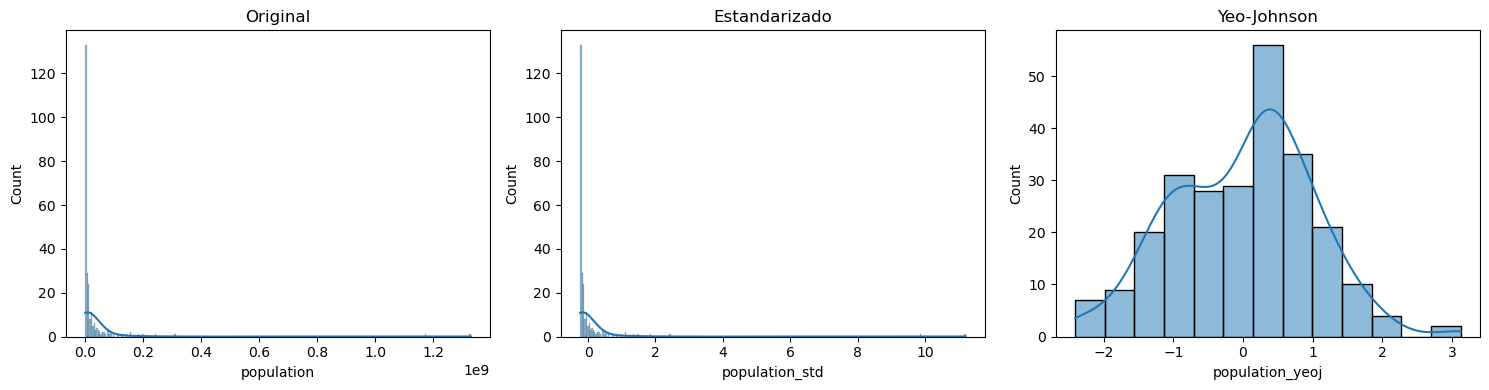

In [ ]:
#
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(data_num['population'], kde=True, ax=axs[0]).set(title='Original')
sns.histplot(df_std['population_std'], kde=True, ax=axs[1]).set(title='Estandarizado')
sns.histplot(df_yeoj['population_yeoj'], kde=True, ax=axs[2]).set(title='Yeo-Johnson')
plt.tight_layout()
plt.show()


In [ ]:
#preparación de datos
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, train_test_split, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Variable objetivo: países con más de 10 millones de habitantes
df['target'] = (df['population'] > 10_000_000).astype(int)

# Variables predictoras (ejemplo)
X = df[['area', 'numeric']]
y = df['target']


In [ ]:
# k-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7450980392156863
Accuracy: 0.7843137254901961
Accuracy: 0.74
Accuracy: 0.76
Accuracy: 0.72


In [24]:
#validación cruzada repetida
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

for train_index, test_index in rkf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7450980392156863
Accuracy: 0.7843137254901961
Accuracy: 0.74
Accuracy: 0.76
Accuracy: 0.72
Accuracy: 0.7450980392156863
Accuracy: 0.8235294117647058
Accuracy: 0.78
Accuracy: 0.66
Accuracy: 0.78
Accuracy: 0.7450980392156863
Accuracy: 0.7647058823529411
Accuracy: 0.74
Accuracy: 0.76
Accuracy: 0.74


In [30]:
from sklearn.metrics import accuracy_score

y_true_total = []
y_pred_total = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_true_total.extend(y_test)
    y_pred_total.extend(y_pred)

accuracy = accuracy_score(y_true_total, y_pred_total)
print("LOOCV Accuracy:", accuracy)



LOOCV Accuracy: 0.75


In [28]:
#división repetida aleatoriamente shuffle
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in ss.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7450980392156863
Accuracy: 0.7450980392156863
Accuracy: 0.7450980392156863
Accuracy: 0.6666666666666666
Accuracy: 0.7843137254901961
